In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df = pd.read_csv('crop_price_prediction_machine_learning.csv', delimiter = ',')

In [3]:
df.head()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Price_Kg
0,0,Andaman and Nicobar Islands,NICOBARS,2006,Kharif,Arecanut,1254.0,2000.0,699.0
1,2,Andaman and Nicobar Islands,NICOBARS,2006,Kharif,Rice,102.0,321.0,34.0
2,3,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Banana,176.0,641.0,30.0
3,4,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Cashewnut,720.0,165.0,696.0
4,5,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Coconut,18168.0,65100000.0,20.0


# Data Preprocessing (Feature Extraction & Data cleaning)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230164 entries, 0 to 230163
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     230164 non-null  int64  
 1   State_Name     230164 non-null  object 
 2   District_Name  230164 non-null  object 
 3   Crop_Year      230164 non-null  int64  
 4   Season         230164 non-null  object 
 5   Crop           230164 non-null  object 
 6   Area           230164 non-null  float64
 7   Production     226434 non-null  float64
 8   Price_Kg       226434 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 15.8+ MB


In [5]:
df.isnull().sum()

Unnamed: 0          0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
Price_Kg         3730
dtype: int64

In [6]:
df['Production'] = df['Production'].fillna(np.mean(df['Production']))
df['Price_Kg'] = df['Price_Kg'].fillna(np.mean(df['Price_Kg']))

In [7]:
df.isnull().sum()

Unnamed: 0       0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Price_Kg         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230164 entries, 0 to 230163
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     230164 non-null  int64  
 1   State_Name     230164 non-null  object 
 2   District_Name  230164 non-null  object 
 3   Crop_Year      230164 non-null  int64  
 4   Season         230164 non-null  object 
 5   Crop           230164 non-null  object 
 6   Area           230164 non-null  float64
 7   Production     230164 non-null  float64
 8   Price_Kg       230164 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 15.8+ MB


In [9]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [10]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Price_Kg
0,Andaman and Nicobar Islands,NICOBARS,2006,Kharif,Arecanut,1254.0,2000.0,699.0
1,Andaman and Nicobar Islands,NICOBARS,2006,Kharif,Rice,102.0,321.0,34.0
2,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Banana,176.0,641.0,30.0
3,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Cashewnut,720.0,165.0,696.0
4,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Coconut,18168.0,65100000.0,20.0


In [11]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [12]:
df['Crop'].unique()

array(['Arecanut', 'Rice', 'Banana', 'Cashewnut', 'Coconut ',
       'Dry ginger', 'Sweet potato', 'Tapioca', 'Black pepper',
       'Dry chillies', 'Sugarcane', 'Turmeric', 'Maize',
       'Other Kharif pulses', 'other oilseeds', 'Arhar/Tur', 'Groundnut',
       'Moong(Green Gram)', 'Urad', 'Bajra', 'Castor seed',
       'Cotton(lint)', 'Horse-gram', 'Jowar', 'Korra', 'Ragi',
       'Sunflower', 'Tobacco', 'Gram', 'Wheat', 'Masoor', 'Safflower',
       'Onion', 'other misc. pulses', 'Samai', 'Small millets',
       'Coriander', 'Potato', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Brinjal', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange',
       'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Tomato', 'Soyabean',
       'Linseed', 'Rapeseed &Mustard', 'Mesta', 'Cowpea(Lobia)', 'Lemon',
       'Pome Granet', 'Sapota', 'Cabbage', 'Sesamum',
       'Other  Rabi pulses', 'Niger seed', 'Sannhamp', 'Varagu', 'Garlic',
       'Ginger', 'Oilseeds total', 'Pulses total', 'Jute',
       'Peas & b

# Data Visualization & EDA (Exploratory Data Analysis)

In [13]:
correlation_matrix = df.corr()

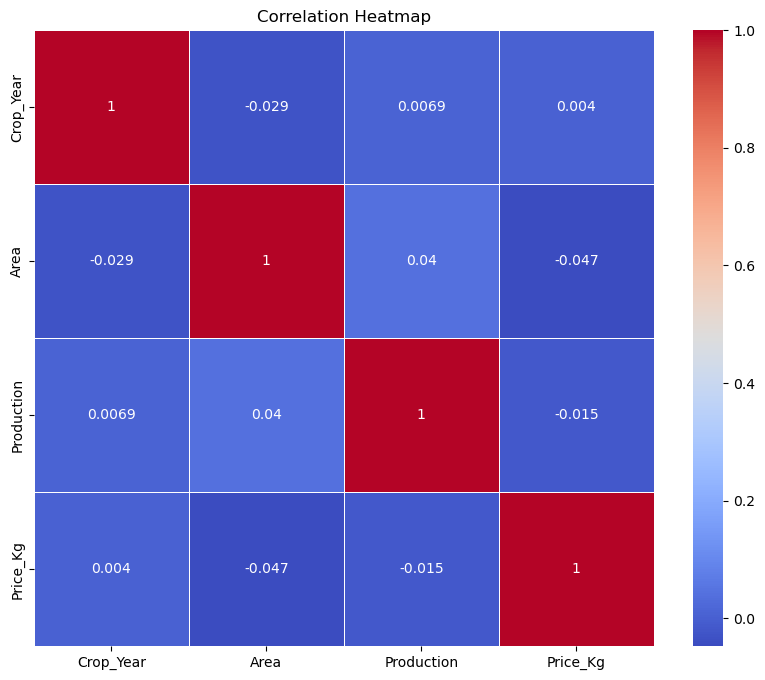

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

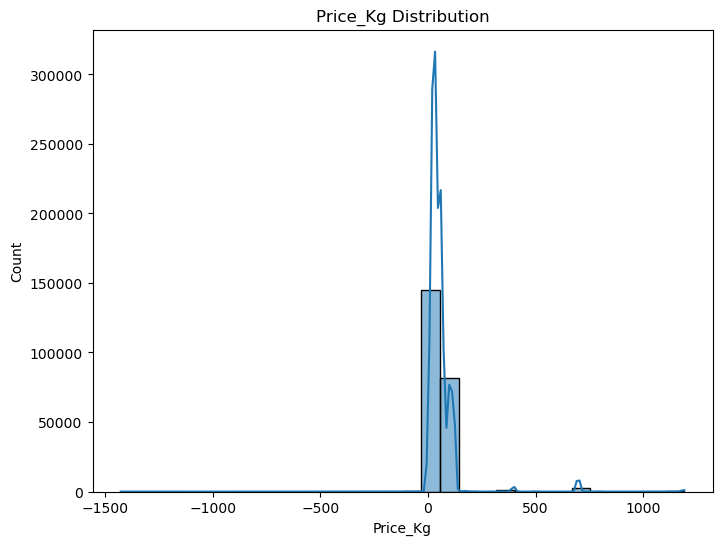

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['Price_Kg'], bins=30, kde=True)
plt.title('Price_Kg Distribution')
plt.xlabel('Price_Kg')
plt.show()

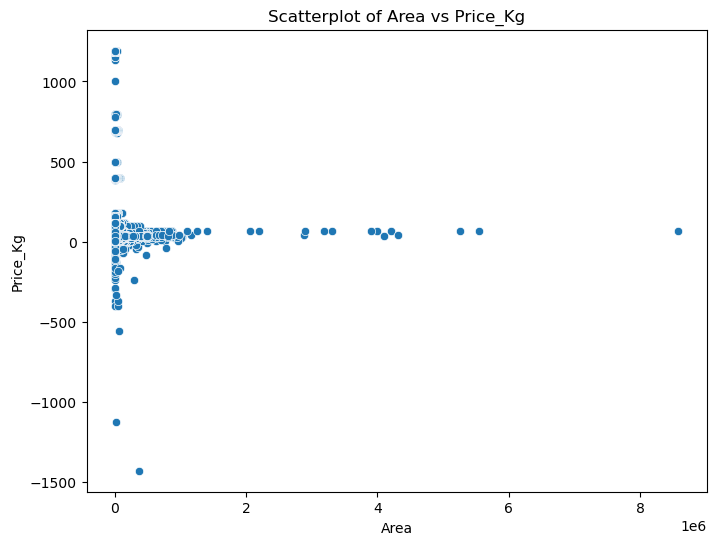

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Price_Kg', data=df)
plt.title('Scatterplot of Area vs Price_Kg')
plt.xlabel('Area')
plt.ylabel('Price_Kg')
plt.show()

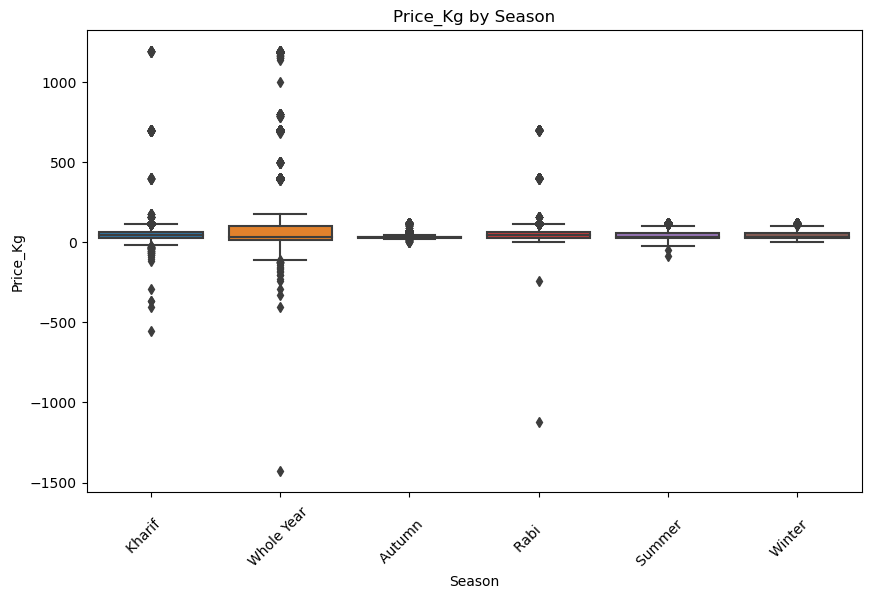

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Price_Kg', data=df)
plt.title('Price_Kg by Season')
plt.xticks(rotation=45)
plt.show()

# Model Building (Using Pipeline)

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [23]:
cat_col = ['State_Name', 'District_Name', 'Season', 'Crop']
num_col = ['Crop_Year', 'Area', 'Production']

In [24]:
cat_col

['State_Name', 'District_Name', 'Season', 'Crop']

In [25]:
num_col

['Crop_Year', 'Area', 'Production']

In [26]:
cat_pipeline = Pipeline(
steps = [
    ('simple imputer', SimpleImputer(strategy='most_frequent')), 
    ('one hot encoder', OneHotEncoder(handle_unknown='ignore'))
]
)

In [27]:
num_pipeline = Pipeline(
steps = [
    ('simple imputer', SimpleImputer(strategy='mean')),
    ('standerd scaler', StandardScaler())
]
)

In [28]:
processor = ColumnTransformer(
[
    ('cat_pipeline', cat_pipeline, cat_col), 
    ('num_pipeline', num_pipeline, num_col)
]
)

In [29]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

# Model Training

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear = LinearRegression()

In [32]:
linear.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = linear.predict(X_test)

In [34]:
from sklearn.metrics import r2_score

In [35]:
print(r2_score(y_test, y_pred))

0.9410086605775393


# Decision Tree:

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [37]:
d_tree = DecisionTreeRegressor()

In [38]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
y_pred = d_tree.predict(X_test)

In [40]:
print(r2_score(y_test, y_pred))

0.996293710634991


# Model Testing

In [67]:
new_data_point = pd.DataFrame({'State_Name': ['Assam'],
                               'District_Name': ['NICOBARS'],
                               'Crop_Year': [2010],
                               'Season': ['Kharif'],
                               'Crop': ['Rice'],
                               'Area': [102.0],
                               'Production': [321.0]})

In [68]:
new_data_point_transformed = processor.transform(new_data_point)

In [69]:
linear_price = linear.predict(new_data_point_transformed)

In [70]:
print("The price of the crop according to linear regression is:", linear_price)

The price of the crop according to linear regression is: [34.20701845]


In [71]:
d_tree_price = d_tree.predict(new_data_point_transformed)

In [72]:
print("The price of the crop according to Decision Tree is:", d_tree_price)

The price of the crop according to Decision Tree is: [34.]


In [60]:
#sns.pairplot(df[['Price_Kg', 'Crop_Year', 'Area', 'Production']])
#plt.show()